In [1]:
import numpy as np
import pandas as pd

In [2]:
ts = pd.Timestamp('2020/1/1')

In [3]:
ts

Timestamp('2020-01-01 00:00:00')

In [4]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [5]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [6]:
pd.to_datetime(['2020-1-1', '2020-1-3', '2020-1-6'])

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-06'], dtype='datetime64[ns]', freq=None)

In [7]:
df = pd.read_csv('data/learn_pandas.csv')
s = pd.to_datetime(df.Test_Date)

In [8]:
s

0     2019-10-05
1     2019-09-04
2     2019-09-12
3     2020-01-03
4     2019-11-06
         ...    
195   2019-10-17
196   2019-09-22
197   2020-01-05
198   2020-01-07
199   2019-11-06
Name: Test_Date, Length: 200, dtype: datetime64[ns]

In [9]:
temp = pd.to_datetime(['2020\\1\\1','2020\\1\\3'],format='%Y\\%m\\%d')
temp

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [10]:
pd.Series(temp)

0   2020-01-01
1   2020-01-03
dtype: datetime64[ns]

In [11]:
df_date_cols = pd.DataFrame({'year': [2020, 2020],
                             'month': [1, 1],
                             'day': [1, 2],
                             'hour': [10, 20],
                             'minute': [30, 50],
                             'second': [20, 40]})
pd.to_datetime(df_date_cols)

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

In [13]:
pd.Series(pd.date_range('2020-1-1','2020-1-21', freq='10D'))

0   2020-01-01
1   2020-01-11
2   2020-01-21
dtype: datetime64[ns]

In [14]:
s = pd.Series(np.random.rand(5),
            index=pd.to_datetime([
                '2020-1-%d'%i for i in range(1,10,2)]))
s

2020-01-01    0.970411
2020-01-03    0.819946
2020-01-05    0.342483
2020-01-07    0.018419
2020-01-09    0.309576
dtype: float64

In [15]:
s.asfreq('D')

2020-01-01    0.970411
2020-01-02         NaN
2020-01-03    0.819946
2020-01-04         NaN
2020-01-05    0.342483
2020-01-06         NaN
2020-01-07    0.018419
2020-01-08         NaN
2020-01-09    0.309576
Freq: D, dtype: float64

In [16]:
s = pd.Series(pd.date_range('2020-1-1','2020-1-3', freq='D'))
s

0   2020-01-01
1   2020-01-02
2   2020-01-03
dtype: datetime64[ns]

In [17]:
s.dt.date

0    2020-01-01
1    2020-01-02
2    2020-01-03
dtype: object

In [18]:
s.dt.dayofweek

0    2
1    3
2    4
dtype: int64

In [19]:
s.dt.dayofyear

0    1
1    2
2    3
dtype: int64

In [20]:
s.dt.weekofyear

C:\Users\Savarus\AppData\Local\Temp\ipykernel_2648\2196672507.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  s.dt.weekofyear


0    1
1    1
2    1
dtype: int64

In [21]:
s.dt.daysinmonth

0    31
1    31
2    31
dtype: int64

In [22]:
s.dt.quarter

0    1
1    1
2    1
dtype: int64

In [23]:
pd.Timestamp('20200102 08:00:00')-pd.Timestamp('20200101 07:35:00')

Timedelta('1 days 00:25:00')

In [24]:
df.Time_Record

0      0:04:34
1      0:04:20
2      0:05:22
3      0:04:08
4      0:05:22
        ...   
195    0:04:31
196    0:04:03
197    0:04:48
198    0:04:58
199    0:05:05
Name: Time_Record, Length: 200, dtype: object

In [25]:
s = pd.to_timedelta(df.Time_Record)
s

0     0 days 00:04:34
1     0 days 00:04:20
2     0 days 00:05:22
3     0 days 00:04:08
4     0 days 00:05:22
            ...      
195   0 days 00:04:31
196   0 days 00:04:03
197   0 days 00:04:48
198   0 days 00:04:58
199   0 days 00:05:05
Name: Time_Record, Length: 200, dtype: timedelta64[ns]

In [26]:
pd.to_timedelta(df.Time_Record).dt.round('min').head()

0   0 days 00:05:00
1   0 days 00:04:00
2   0 days 00:05:00
3   0 days 00:04:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

In [27]:
pd.to_timedelta(df.Time_Record).dt.round('5min').head()

0   0 days 00:05:00
1   0 days 00:05:00
2   0 days 00:05:00
3   0 days 00:05:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

In [28]:
pd.Timestamp('20200907') - pd.offsets.MonthEnd()

Timestamp('2020-08-31 00:00:00')

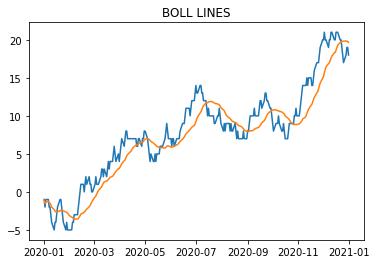

In [41]:
import matplotlib.pyplot as plt
idx = pd.date_range('20200101', '20201231', freq='B')
np.random.seed(2020)
data = np.random.randint(-1,2,len(idx)).cumsum() # 随机游动构造模拟序列
s = pd.Series(data,index=idx)
r = s.rolling('30D')
plt.plot(s)
plt.title('BOLL LINES')
plt.plot(r.mean())

In [30]:
r1 = s.shift(freq='50D')

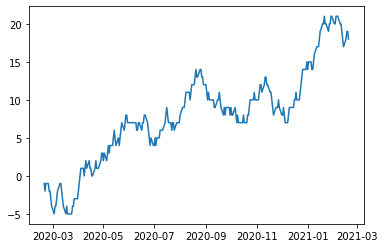

In [31]:
plt.plot(r1)

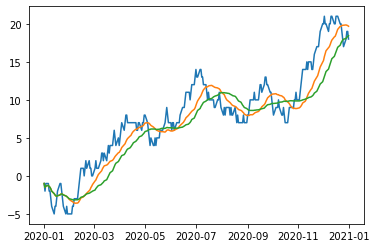

In [40]:
r1 = s.rolling('30D')
plt.plot(s)
plt.plot(r1.mean())
r2 = s.rolling('50D')
plt.plot(r2.mean())

In [42]:
s

2020-01-01    -1
2020-01-02    -2
2020-01-03    -1
2020-01-06    -1
2020-01-07    -2
              ..
2020-12-25    17
2020-12-28    18
2020-12-29    19
2020-12-30    19
2020-12-31    18
Freq: B, Length: 262, dtype: int32

In [43]:
s.shift(freq='50D')

2020-02-20    -1
2020-02-21    -2
2020-02-22    -1
2020-02-25    -1
2020-02-26    -2
              ..
2021-02-13    17
2021-02-16    18
2021-02-17    19
2021-02-18    19
2021-02-19    18
Length: 262, dtype: int32

In [44]:
r1

Rolling [window=2592000000000000,min_periods=1,center=False,win_type=freq,axis=0]